## Paquetes necesarios

Deben instalarse los paquetes: 
* pandas
* matplotlib
* statsmodels
* seaborn
* scikit-learn

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Cargar el paquete Yahoo Finance

In [2]:
!pip install yfinance

In [3]:
def preprocessing_yf(symbol):
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Eliminar la columna adj close
  del df["adj close"]

  return df

In [4]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Descarga la serie de tiempo de la accción de Amazon

In [5]:
df = preprocessing_yf("AMZN")

[*********************100%***********************]  1 of 1 completed


In [6]:
df=df.asfreq('b') #bussiness day
df=df.fillna(method='ffill')

In [7]:
df.head()

,open,high,low,close,volume
time,,,,,
1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,1.443120e+09
1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,2.940000e+08
1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,1.221360e+08
1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,1.093440e+08
1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,3.770640e+08


In [8]:
df.tail()

,open,high,low,close,volume
time,,,,,
2024-10-15 00:00:00+00:00,187.690002,187.690002,188.410004,184.580002,32178900.0
2024-10-16 00:00:00+00:00,186.889999,186.889999,187.779999,185.610001,23456800.0
2024-10-17 00:00:00+00:00,187.529999,187.529999,188.940002,186.000000,25039400.0
2024-10-18 00:00:00+00:00,188.990005,188.990005,190.740005,186.279999,37417700.0
2024-10-21 00:00:00+00:00,189.070007,189.070007,189.460007,186.399994,24612200.0


In [9]:
df.describe()

,open,high,low,close,volume
count,7158.000000,7158.000000,7158.000000,7158.000000,7.158000e+03
mean,38.528991,38.528991,38.986682,38.047513,1.361823e+08
std,55.050869,55.050869,55.689865,54.393507,1.367933e+08
min,0.069792,0.069792,0.072396,0.065625,9.744000e+06
25%,2.087750,2.087750,2.131125,2.050000,6.366650e+07
50%,8.840500,8.840500,8.927000,8.716750,1.007730e+08
75%,58.466624,58.466624,58.925376,58.069126,1.555940e+08
max,200.000000,200.000000,201.199997,199.050003,2.086584e+09


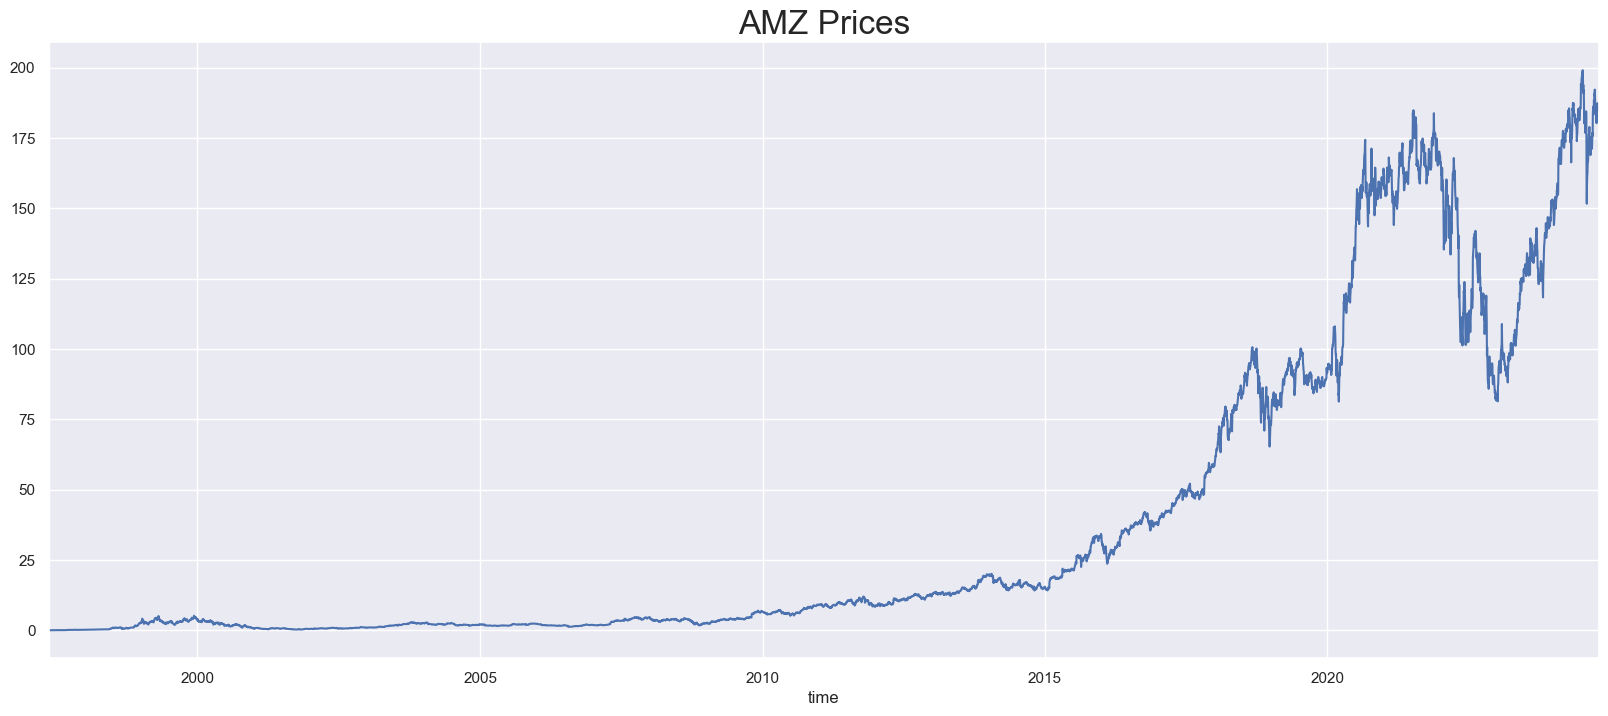

In [10]:
df.close.plot(figsize=(20,8))
plt.title("AMZ Prices", size = 24)
#plt.ylim(0,2300)
plt.show()

<Axes: xlabel='time'>

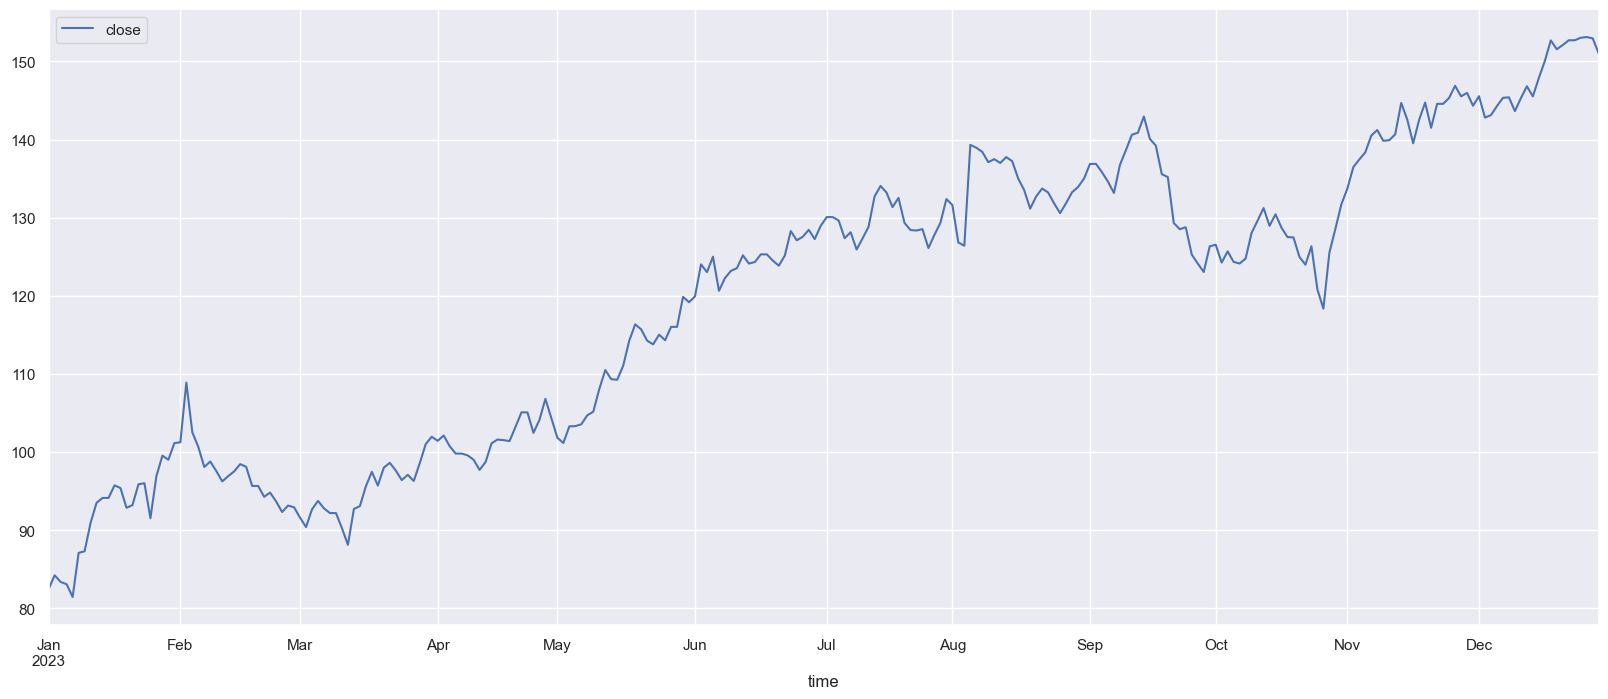

In [11]:
df[["close"]].loc["2023"].plot(figsize=(20,8))

## Prueba de estacionalidad de la serie de tiempo

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

Se calcula un estadístico de prueba ($\lambda_0$), que también se llama estadístico de constraste.

Este estadístico de prueba se compara con un valor crítico de la prueva ($\lambda_{critico}$).

Si $(\lambda_0 < \lambda_{critico})$ se rechaza $H_0$. Por tanto, la serie es estacionaria.

Otra forma es calculando el $p_{valor}$ con el cual se obtiene evidencia a favor de la hipótesis nula.

Si el $p_{valor}$ es cercano a cero, la probabilidad de aceptar la hipótesis nula es pequeña.

$\alpha =$ nivel de significancia.

$1 - \alpha =$ nivel de confianza.

$H_0: $ La series no es estacionaria.

Si $p_{valor} < \alpha $ se rechaza $H_0$. Por tanto, la serie es estacionaria.

In [12]:
vL = sts.adfuller(df.close)
vL

(1.0850075090786198,
 0.9950866146469888,
 35,
 7122,
 {'1%': -3.431268514249962,
  '5%': -2.861945910598893,
  '10%': -2.5669860621190232},
 23556.63835103074)

In [13]:
print(f'El estadístico de prueba es : {vL[0]}') # Estadístico de prueba

El estadístico de prueba es : 1.0850075090786198


In [14]:
print(f'El pvalor es : {vL[1]}')

El pvalor es : 0.9950866146469888


In [15]:
print(f'El período de tiempo en que se detecta autocorrelación es : {vL[2]}')

El período de tiempo en que se detecta autocorrelación es : 35


In [16]:
print(f'La cantidad de datos en la serie de tiempos es : {vL[3]}')

La cantidad de datos en la serie de tiempos es : 7122


In [17]:
print(f'Los valores críticos para cada nivel de significancia son : {vL[4]}')

Los valores críticos para cada nivel de significancia son : {'1%': -3.431268514249962, '5%': -2.861945910598893, '10%': -2.5669860621190232}


In [18]:
print(f'El criterio de información maximizado es : {vL[5]}')

El criterio de información maximizado es : 23556.63835103074


Para un nivel de confianza del 95%, la serie no es estacionaria

La $H_0: $ no debe ser rechazada.

La serie NO es estacionaria

In [19]:
sts.adfuller(df[["close"]].loc["2023"])

(-1.2162250875669673,
 0.66657743642051,
 0,
 259,
 {'1%': -3.4558530692911504,
  '5%': -2.872764881778665,
  '10%': -2.572751643088207},
 1066.3996631946254)

## Descomposición de la serie en componentes

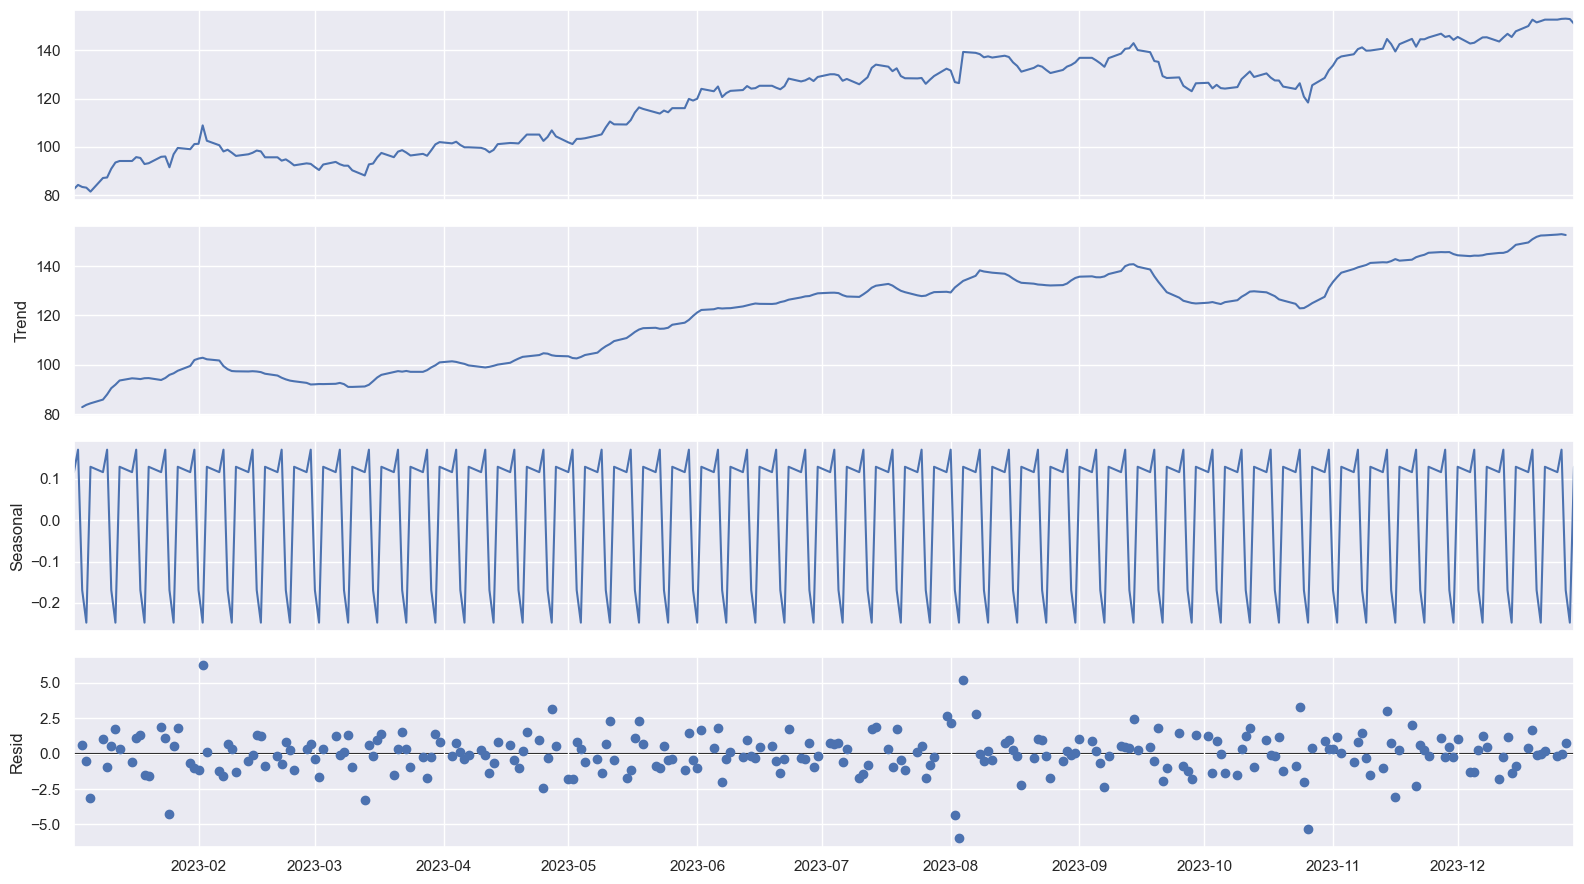

In [20]:
s_dec_additive = seasonal_decompose(df[["close"]].loc["2023"], model = "additive")
fig = s_dec_additive.plot();
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Caminata aleatoria

In [21]:
steps = np.random.normal(loc=0, scale=1, size=len(df[["close"]].loc["2023"]))

In [22]:
steps.shape

(260,)

In [23]:
P = 100 + np.cumsum(steps)

In [24]:
P = pd.DataFrame(P)

In [25]:
P.index =df[["close"]].loc["2023"].index

In [26]:
P.columns = ["Caminata Aleatoria"]

In [27]:
P

,Caminata Aleatoria
time,
2023-01-02 00:00:00+00:00,100.895876
2023-01-03 00:00:00+00:00,100.122675
2023-01-04 00:00:00+00:00,100.266682
2023-01-05 00:00:00+00:00,101.351623
2023-01-06 00:00:00+00:00,101.583383
...,...
2023-12-25 00:00:00+00:00,132.061413
2023-12-26 00:00:00+00:00,132.174278
2023-12-27 00:00:00+00:00,131.687852


<Axes: xlabel='time'>

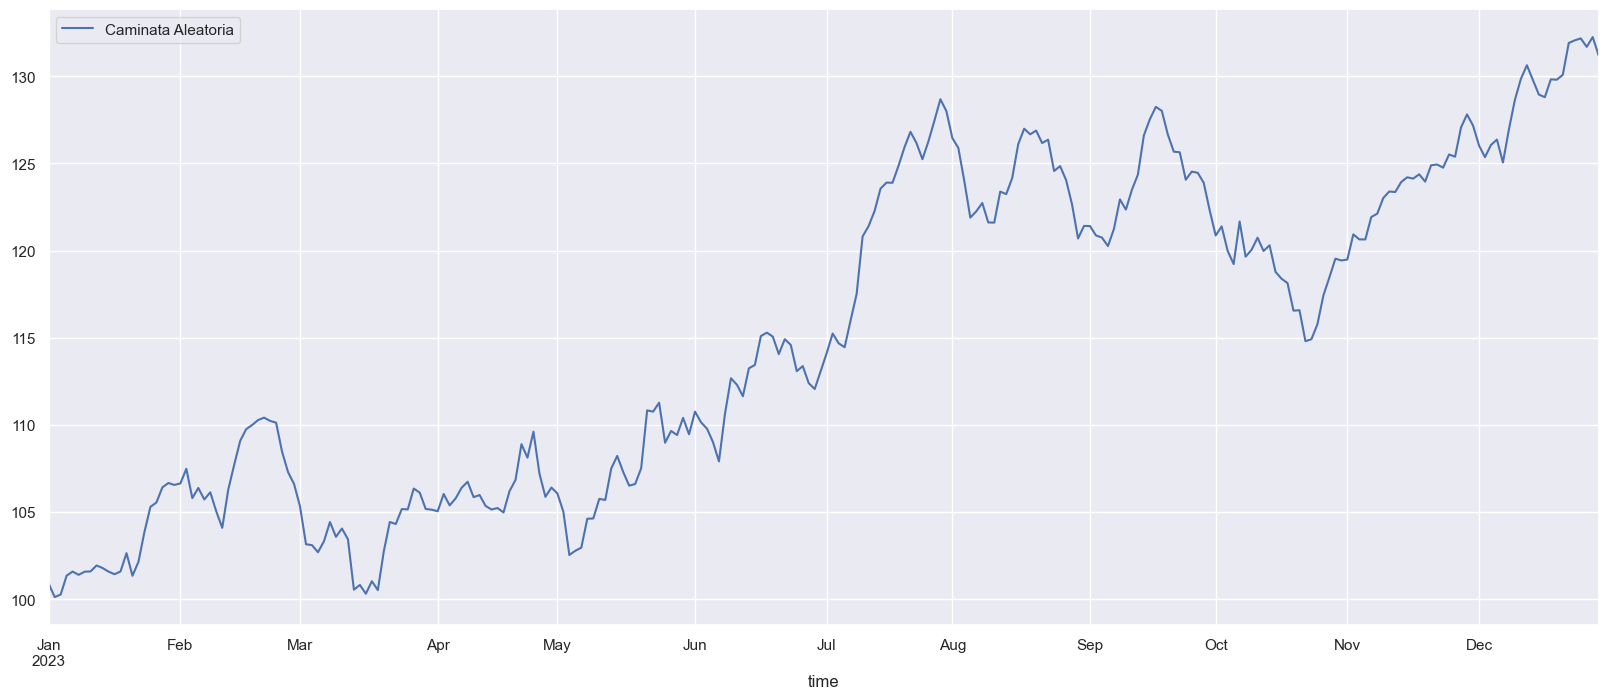

In [28]:
P.plot(figsize=(20,8))

In [29]:
P["Serie"] = df[["close"]].loc["2023"]

In [30]:
P["Ruido Blanco"] = steps

In [31]:
P.head()

,Caminata Aleatoria,Serie,Ruido Blanco
time,,,
2023-01-02 00:00:00+00:00,100.895876,82.470001,0.895876
2023-01-03 00:00:00+00:00,100.122675,84.209999,-0.773201
2023-01-04 00:00:00+00:00,100.266682,83.360001,0.144008
2023-01-05 00:00:00+00:00,101.351623,83.070000,1.084940
2023-01-06 00:00:00+00:00,101.583383,81.430000,0.231761


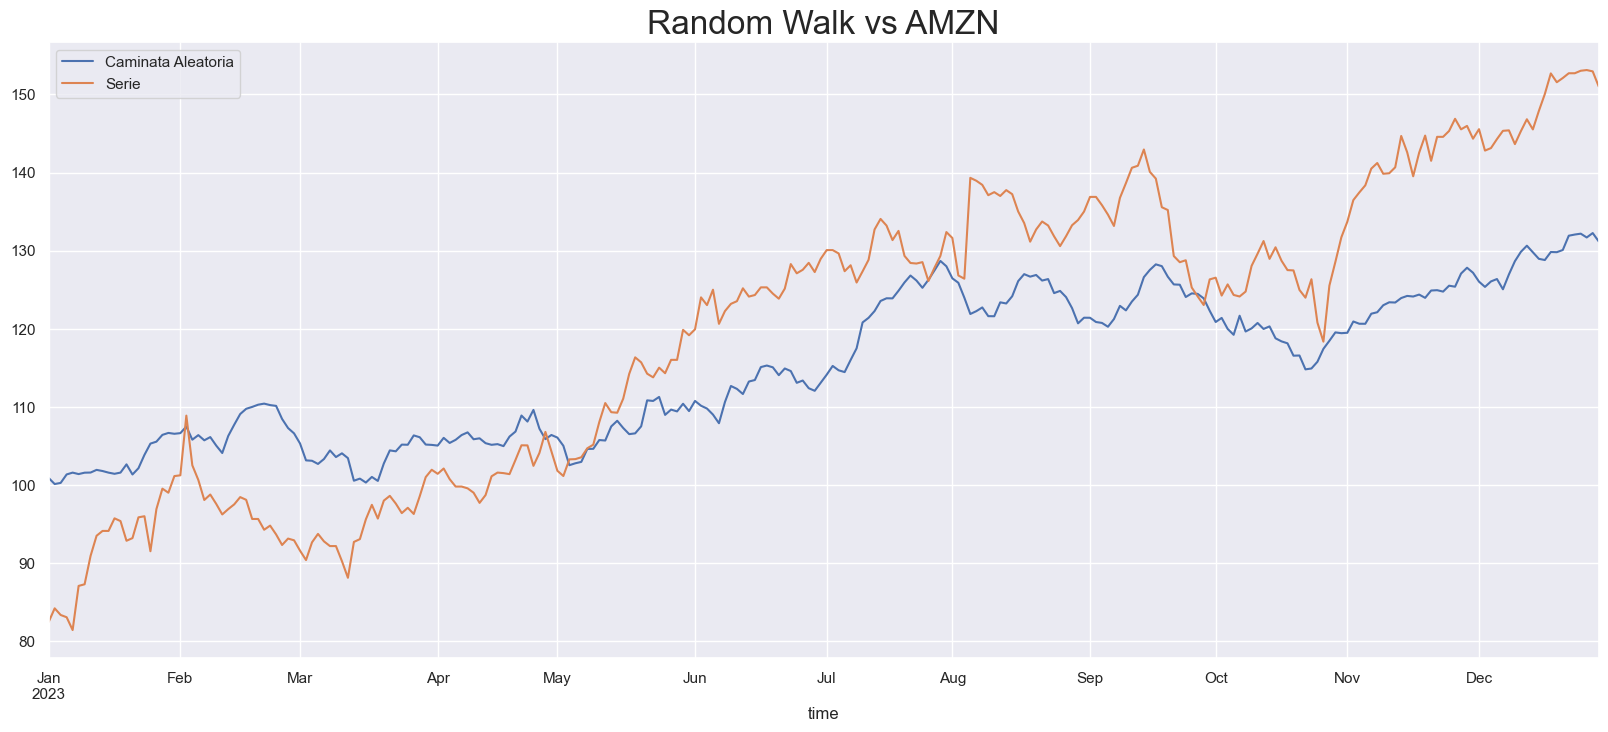

In [32]:
P["Caminata Aleatoria"].plot(figsize = (20,8))
P["Serie"].plot()
plt.title("Random Walk vs AMZN", size = 24)
plt.legend() 
plt.show()

## Función de autocorrelación ACF

https://otexts.com/fpp2/autocorrelation.html

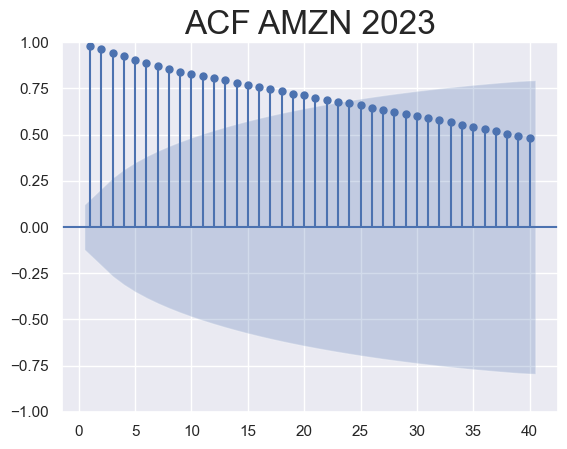

In [33]:
sgt.plot_acf(P["Serie"], lags = 40, zero = False)
plt.title("ACF AMZN 2023", size = 24)
plt.show()

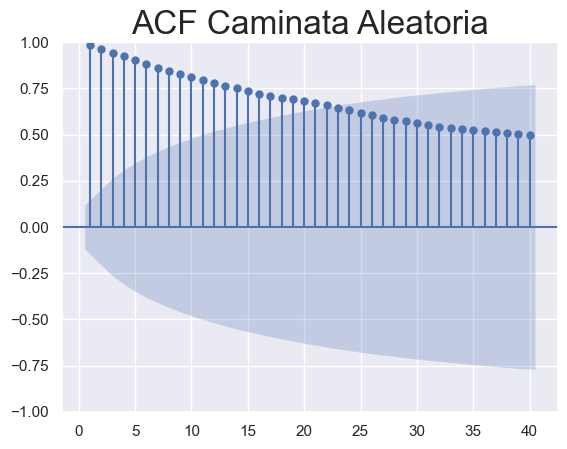

In [34]:
sgt.plot_acf(P["Caminata Aleatoria"], lags = 40, zero = False)
plt.title("ACF Caminata Aleatoria", size = 24)
plt.show()

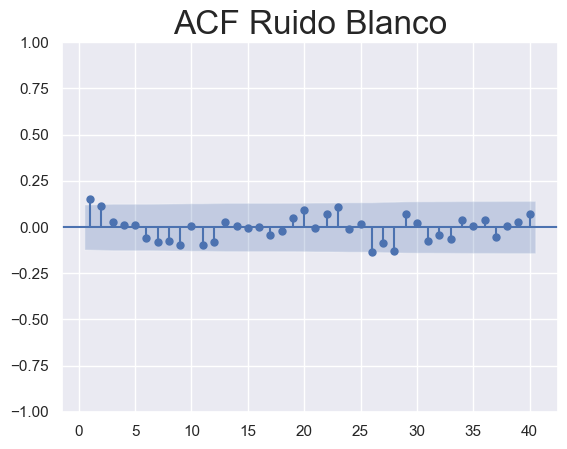

In [35]:
sgt.plot_acf(P["Ruido Blanco"], lags = 40, zero = False)
plt.title("ACF Ruido Blanco", size = 24)
plt.show()

## Función de autocorrelación parcial PACF

https://en.wikipedia.org/wiki/Partial_autocorrelation_function

### La autocorrelación parcial de un modelo AR( p ) es distinta de cero para rezagos menores o iguales a p y 0 para rezagos mayores que p .

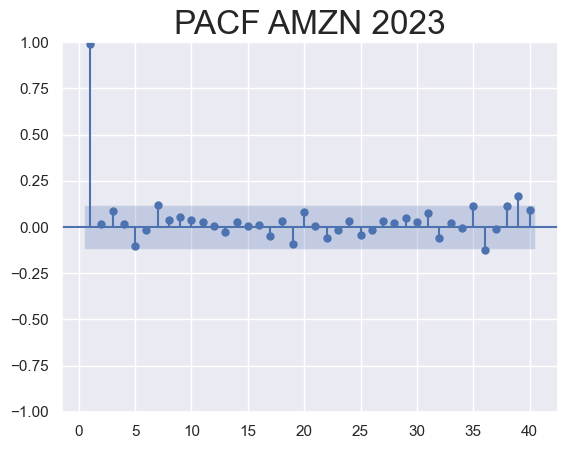

In [36]:
sgt.plot_pacf(P["Serie"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF AMZN 2023", size = 24)
plt.show()

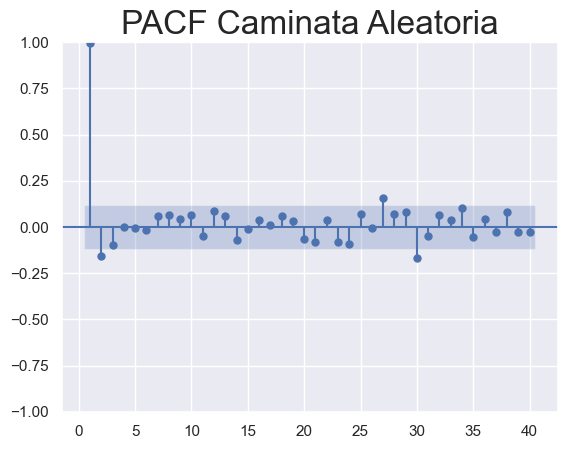

In [37]:
sgt.plot_pacf(P["Caminata Aleatoria"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Caminata Aleatoria", size = 24)
plt.show()

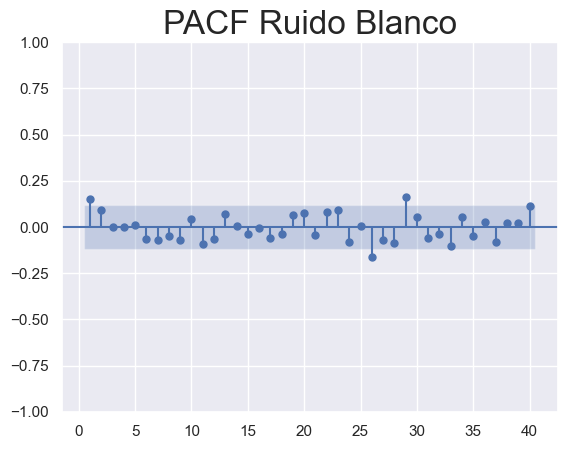

In [38]:
sgt.plot_pacf(P["Ruido Blanco"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Ruido Blanco", size = 24)
plt.show()

## Ejemplo de data AR(1)

In [39]:
# generate random Gaussian values
from numpy.random import seed
from numpy.random import randn

In [40]:
seed(145)
values = randn(100)
values

array([-8.28622777e-01,  6.03814871e-02,  1.20277692e+00,  6.76414745e-01,
       -1.66968675e+00,  9.45451901e-01, -4.53901557e-02,  1.92633477e+00,
        9.93790206e-02,  6.12748729e-01, -9.88890950e-01,  1.76147814e+00,
        1.64287431e+00, -2.34978337e+00,  1.01951838e+00, -1.54520800e-01,
        1.90617362e-01, -7.00962804e-01, -7.21156371e-01, -2.56226439e-01,
       -6.48452168e-01, -8.58085383e-01, -9.10095975e-02, -8.36549935e-01,
       -5.57374821e-01, -1.19450904e+00, -2.71677377e-01, -2.67178906e+00,
        1.46979984e+00, -7.98960931e-01,  6.67973173e-01,  7.25920975e-01,
        4.50386095e-01,  3.37322249e-01,  8.48871425e-01,  3.14733874e-02,
       -1.46562714e+00, -6.17224892e-01, -8.55786095e-01,  1.03373825e+00,
        8.76262559e-01,  6.13740830e-02,  1.64758482e+00, -2.41248417e-01,
        1.12586780e+00, -1.10335960e+00,  9.26900904e-01,  7.66556129e-01,
       -9.90633997e-02,  2.52015473e+00, -2.24864777e+00,  3.56825842e-01,
       -1.04092786e-01,  

In [41]:
Lista = []
x = 1
Lista.append(x)
for i in range(100):
    x = 0.6*x + 0.1*values[i]
    Lista.append(x)
Lista

[1,
 0.5171377222787987,
 0.31632078207825026,
 0.3100701612840071,
 0.25368357122374435,
 -0.0147585325369477,
 0.08569007056772034,
 0.04687502677339967,
 0.22075849268056033,
 0.14239299767191552,
 0.14671067147575795,
 -0.010862692143690345,
 0.16963019904555104,
 0.2660655501227537,
 -0.07533900709205787,
 0.056748433538382714,
 0.018596980162427827,
 0.030219924320710044,
 -0.05196432582072853,
 -0.1032942326234025,
 -0.08759918349633163,
 -0.11740472692629439,
 -0.15625137442560466,
 -0.10285178440227018,
 -0.1453660641060949,
 -0.14295712060713583,
 -0.20522517658075873,
 -0.15030284363274402,
 -0.3573606121706717,
 -0.06743638316097475,
 -0.12035792298087719,
 -0.005417436450463872,
 0.069341635675385,
 0.08664359085862705,
 0.08571837936591656,
 0.1363181700996714,
 0.08493824080021228,
 -0.09559977001863335,
 -0.11908235121809246,
 -0.15702802019477272,
 0.009157013266101008,
 0.09312046389591788,
 0.06200968663554859,
 0.20196429409586475,
 0.09705373479567828,
 0.170819020

<Axes: >

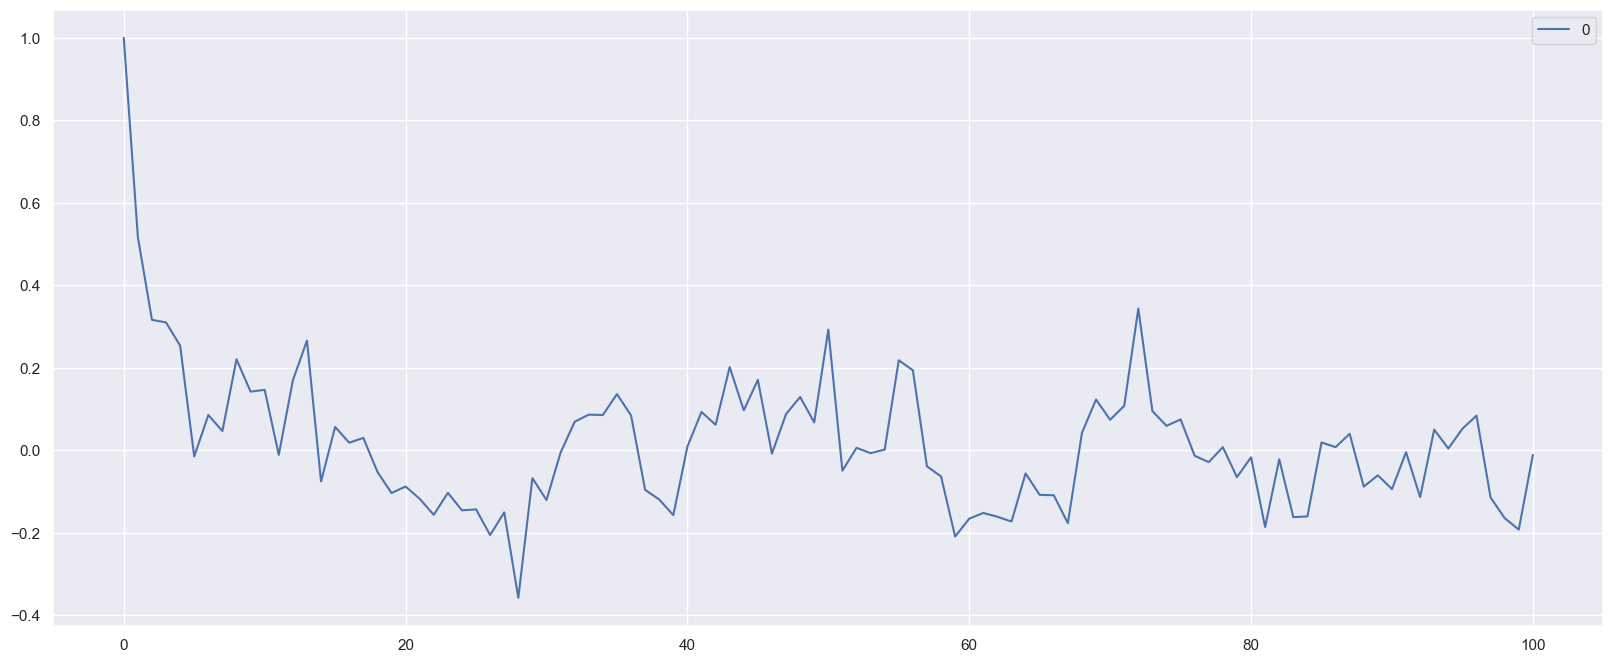

In [42]:
pd.DataFrame(Lista).plot(figsize = (20,8))

In [43]:
vL = sts.adfuller(Lista)
vL

(-5.2379812109040635,
 7.3507759005079185e-06,
 1,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 -147.2759916305568)

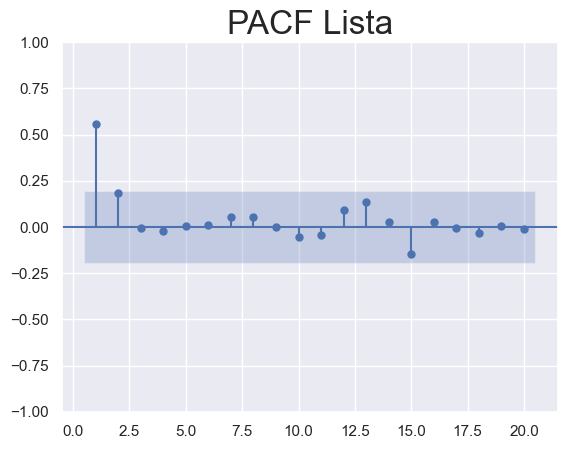

In [44]:
sgt.plot_pacf(Lista, lags = 20, zero = False, method = ('ols'))
plt.title("PACF Lista", size = 24)
plt.show()

In [45]:
df = pd.DataFrame(Lista)
df.columns = ["Serie"]
df.index.name = "Tiempo"
df

,Serie
Tiempo,
0,1.000000
1,0.517138
2,0.316321
3,0.310070
4,0.253684
...,...
96,0.084184
97,-0.114274
98,-0.164170


In [46]:
df['Serie_1'] = df['Serie'].shift(1)
df.head(3)

,Serie,Serie_1
Tiempo,,
0,1.000000,NaN
1,0.517138,1.000000
2,0.316321,0.517138


In [47]:
df.dropna(inplace = True)
df.head(3)

,Serie,Serie_1
Tiempo,,
1,0.517138,1.000000
2,0.316321,0.517138
3,0.310070,0.316321


In [48]:
X = df.Serie_1.values
y = df.Serie.values


In [49]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [51]:
lr1 = LinearRegression()
model = lr1.fit(X_train, y_train)

In [52]:
lr1.intercept_

array([-0.00408157])

In [53]:
lr1.coef_

array([[0.58729471]])

In [54]:
y1_pred = lr1.predict(X_test)

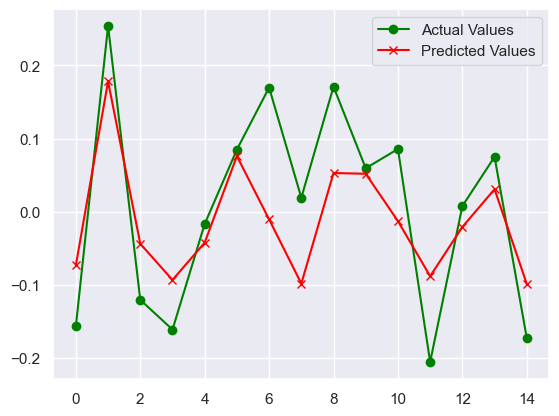

In [55]:
plt.plot(y_test[-15:], label="Actual Values", color = 'Green', marker = 'o')
plt.plot(y1_pred[-15:], label="Predicted Values", color = 'Red', marker = 'x')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y1_pred))

0.5846968750812515


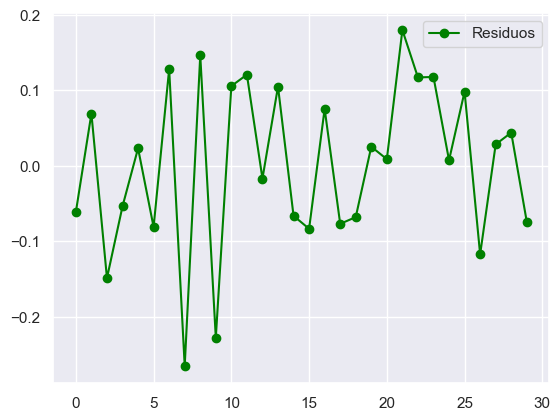

In [62]:
plt.plot(y_test- y1_pred, label="Residuos", color = 'Green', marker = 'o')
plt.legend()
plt.show()

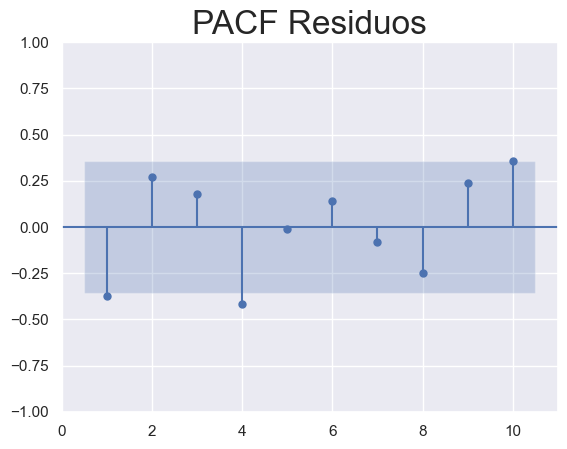

In [63]:
sgt.plot_pacf(y_test- y1_pred, lags = 10, zero = False, method = ('ols'))
plt.title("PACF Residuos", size = 24)
plt.show()

In [64]:
vL = sts.adfuller(y_test- y1_pred)
vL

(-3.180248616176978,
 0.02115681302410035,
 3,
 26,
 {'1%': -3.7112123008648155,
  '5%': -2.981246804733728,
  '10%': -2.6300945562130176},
 -39.288995224770886)